In [2]:
%pip install tensorflow

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 3.7 MB/s eta 0:00:0000:0100:02
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.7 MB/s eta 0:00:00
Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl (25.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
X = pd.read_csv("/Users/rajsilwal/Documents/GitHub/Churn-Analysis/data/X_scaled.csv")
y = pd.read_csv("/Users/rajsilwal/Documents/GitHub/Churn-Analysis/data/y.csv")

In [6]:
y = y.values.ravel()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

/Users/rajsilwal/anaconda3/envs/project/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling model

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Train the model

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7289 - loss: 0.5323 - val_accuracy: 0.7897 - val_loss: 0.4526
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7608 - loss: 0.4725 - val_accuracy: 0.7959 - val_loss: 0.4427
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.7786 - loss: 0.4640 - val_accuracy: 0.8021 - val_loss: 0.4376
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7810 - loss: 0.4599 - val_accuracy: 0.7853 - val_loss: 0.4404
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.7748 - loss: 0.4590 - val_accuracy: 0.7933 - val_loss: 0.4369
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.7788 - loss: 0.4573 - val_accuracy: 0.7897 - val_loss: 0.4361
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.7761 - loss: 0.4548 - val_accuracy: 0.8039 - val_loss: 0.4357
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.7843 - loss: 0.4541 - val_

Evaluate Model

In [11]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
Accuracy: 0.7899219304471257
[[948  87]
 [209 165]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1035
           1       0.65      0.44      0.53       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



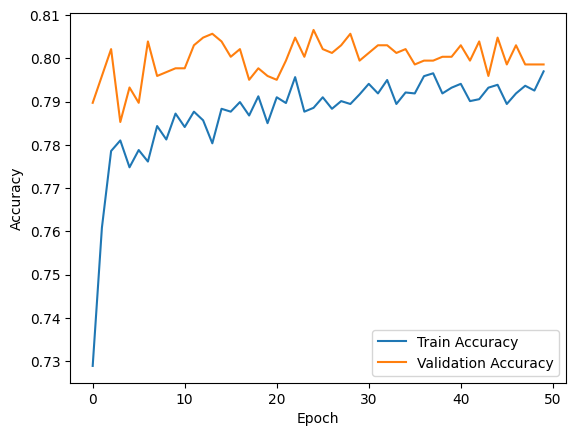

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()